In [23]:
from PIL import Image
from matplotlib import pyplot as plt
from itertools import product
import random
import numpy as np

# В данной работе предлагается реализовать метод главных компонент для сокращения
# размерности даннных. В качестве данных предлагаются изображения с лицами людей.



In [24]:
def load_data(data_file_path):

    # Функция для загрузки данных.
    # Принимает на вход путь к файлу.
    # Возвращает матрицу данных.

    with open(data_file_path) as input_file:
        X = list()
        for line in input_file:
            row = list(map(float, line.split(',')))
            X.append(row)
        return np.array(X, float)

In [25]:
def pca(X, k):

    # Функция, реализующая алгоритм метода главных компонент. Принимает на вход матрицу данных X и
    # число главных компонент k.
    # Должна возвращать k главных компонент в виде матрицы (главные компоненты - столбцы) и долю сохраненной дисперсии.

    m, n = X.shape  # m - количество примеров в матрице X, n - количество признаков.

    U = np.zeros((X.shape[1], k))  # матрица главных компонент
    saved_disp = 0  # доля сохранненой дисперсии после преобразования

    centr = (X - np.mean(X, axis = 0))
    cov_matrix = (centr.T @ centr)
    eig_value, eig_vect = np.linalg.eig(cov_matrix)
    
    U = (eig_vect[:,:k])
    
    saved_disp = np.sum(eig_value[:k]) / np.sum(eig_value) # доля сохранненой дисперсии после преобразования

    return U, saved_disp

In [29]:
def project_data(X, U):

    # Функция для проекции данных в пространство с базисом, заданным матрицей U.
    # Принимает матрицу данных X и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны в заданное пространство.

    Xp = np.zeros((X.shape[0], U.shape[1]))  # результат

    Xp = X @ U


    return Xp

In [30]:
def recover_data(Xp, U):

    # Функция для проекции данных из пространства с базисом, заданным матрицей U, в базис ijk.
    # Принимает матрицу данных Xp и матрицу U, задающую базис пространства.
    # Должна возвращать новую матрицу данных, где все точки спроецированны из заданного пространства,
    # в пространство с базисом ijk.

    X_rec = np.zeros((Xp.shape[0], U.shape[0]))  # результат

    X_rec = Xp @ U.T

    return X_rec

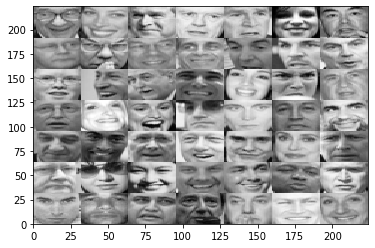

Доля сохраненной дисперсии (должна быть ~0.911 при K = 64): 0.8946808356208


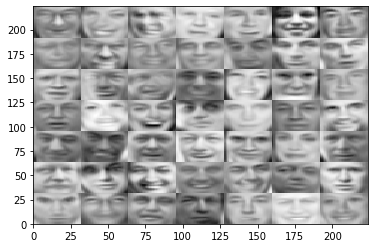

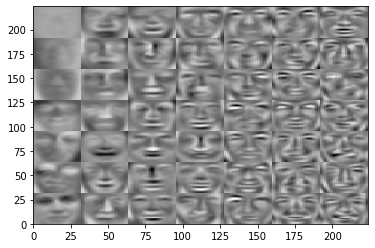

In [31]:
X = load_data('faces.txt')

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

K = 64  # количество главных компонент, можно поварьировать

U, disp = pca(X, K)

print('Доля сохраненной дисперсии (должна быть ~0.911 при K = 64):', disp)

Xp = project_data(X, U)
X_rec = recover_data(Xp, U)

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = -X_rec[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()

hm = np.zeros((32 * 7, 32 * 7))
for i in range(49):
    im_x = i % 7 * 32
    im_y = i // 7 * 32
    for j in range(X.shape[1]):
        px_x = im_x + j % 32
        px_y = im_y + j // 32
        hm[7 * 32 - 1 - px_x, px_y] = U.transpose()[i, j]
plt.pcolor(hm, cmap='Greys')
plt.show()